<h2 style="text-align:center; margin:40px"> Algoritmo não supervisionado </h2>

Aplicação do algoritmos não supervisionado K-Means na prática, a partir da base de dados iris.

In [0]:
%matplotlib inline
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans

np.random.seed(42)

In [0]:
#Carrega a base de dados

iris = datasets.load_iris()

#Converte os arrays de valores em DataFrames e específica o nome das colunas para as bases de treino e teste
x = pd.DataFrame(iris.data, columns=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])
y = pd.DataFrame(iris.target, columns=['Target'])


Text(0.5, 1.0, 'Pétala comprimento vs largura')

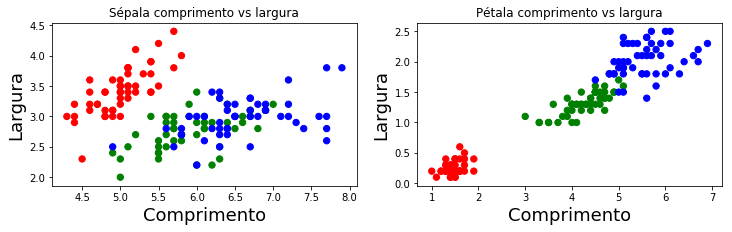

In [3]:
plt.figure(figsize=(12,3)) #Defini a altura e largura da imagem
colors = np.array(['red', 'green', 'blue']) #cria um array de cores para as espécies

plt.subplot(1, 2, 1)

#Plot do comprimento e largura da sépala de cada espécie de flor
plt.scatter(x['Sepal Length'], x['Sepal Width'], c=colors[y['Target']], cmap='gist_rainbow',s=40)
plt.xlabel('Comprimento', fontsize=18)
plt.ylabel('Largura', fontsize=18)
plt.title('Sépala comprimento vs largura')

#Plot do comprimento e largura da pétala de cada espécie de flor
plt.subplot(1,2,2)
plt.scatter(x['Petal Length'], x['Petal Width'], c=colors[y['Target']], cmap='gist_rainbow',s=40)
plt.xlabel('Comprimento', fontsize=18)
plt.ylabel('Largura', fontsize=18)
plt.title('Pétala comprimento vs largura')


<h3> Aplicando o K-Means </h3>

No código a seguir,  vamos utilizar o algoritmo K-Means para visualizar a criação dos agrupamentos e observar os centroides em cada iteração.

Primeiro precisamos criar o objeto <b>KMeans</b> com os seguintes parâmetros:
<ul>
    <li><b>n_clusters:</b> Número de clusters desejados (K)</li>
    <li><b>n_init:</b> Número de inicializações aleatórias. O padrão é 10.</li>
    <li><b>init:</b> Método de inicialização. O padrão é 'k-means++'. Também podemos optar por 'random' ou passar uma lista de centroides.</li>
    <li><b>max_iter:</b> Número máximo de iterações. O padrão é 300. Geralmente o algoritmo converge bem antes disso.</li>
</ul>

In [0]:
km = KMeans(n_clusters = 3, n_init = 10, init = 'k-means++', max_iter = 300)

Posteriormente <b>treinamos o algoritmo</b>, ou seja, calibramos a posição dos centroides na média dos elementos do grupo, utilizando a função <b>fit</b>

In [5]:
y_kmeans = km.fit_predict(x)

centers = km.cluster_centers_ #identifica o centroide de cada agrupamento na base de dados
centers

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [7]:
df_iris = x.copy()
df_iris['kmeans'] = y_kmeans
df_iris.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,kmeans
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [8]:
df_iris['kmeans'].unique()

array([1, 0, 2])

A partir do método Elbow (método do cotovelo) encontramos o número ótimo de clusters para a classificação K-means. O método elbow se baseia 

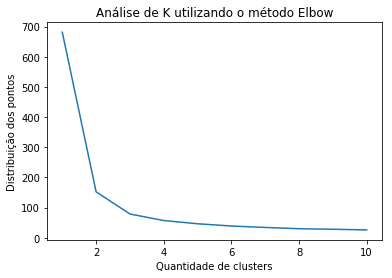

In [9]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
#Plota o resultado em um gráfico de linhas, permitindo observar o ponto ótimo de K, na dobra do cotovelo
plt.plot(range(1, 11), wcss)
plt.title('Análise de K utilizando o método Elbow')
plt.xlabel('Quantidade de clusters')
plt.ylabel('Distribuição dos pontos') #dsitribuição dos pontos empregado da soma dos erros ao quadrado
plt.show()

#Validação

A silhueta é uma métrica utilizada para mensurar a qualidade de um agrupamento priorizando grupos densos/concisos e bem separados, ou seja, favorecendo uma pequena distância intracluster e uma grande distância intercluster.

A partir do pacote sklearn, iremos fazer o cálculo da silhueta para determinar o melhor valor de K.

In [0]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

In [0]:
K_min = 3
K_max = 30

Text(4, 0.527819012356409, 'Melhor K : 3')

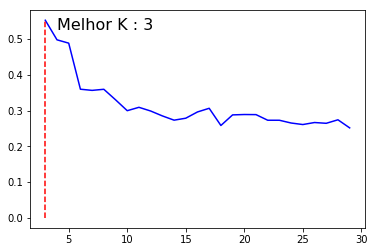

In [12]:
K = list(range(K_min, K_max))
sil = []
for i in range(K_min, K_max):
    km = KMeans(n_clusters = i)
    labels = km.fit_predict(x)
    sil.append(silhouette_score(x, labels))
plt.plot(K, sil, color = 'blue')
idx = np.argmax(sil)
plt.plot([K[idx], K[idx]], [0, sil[idx]], '--', color = 'red')
plt.text(K[idx]+1, sil[idx]-0.025, 'Melhor K : %d' % K[idx], fontdict={'fontsize':16})